# Naive Bayes 
- Bernoulli -> features are binary classes. eg. tıklanma tahmini, e posta açılıp açılmama gibi olayları tahmin etmek için kullanılır
- Multinominal -> counting, word freq. data. 
- Gaussian -> countinous data. eg. can be used for when age height weight classes used for classification.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning

In [3]:
setup_df        =   SetupDataFrame()
analyze_df      =   AnalyzeDataFrame()
visualize_df    =   VisualizeDataFrame()
eval_model      =   EvalModel()
hp_tuning_model =   HyperParameterTuning()

In [4]:
df = setup_df.setup_ml("11-iris.csv")

In [5]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
***************************** First 5 Data in the Dataframe ******************************
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype

In [6]:
cat_cols, num_cols, cat_but_car_cols = analyze_df.grab_col_names(df)

Observations: 150
Variables: 6
cat_cols: 1
num_cols: 5
cat_but_car: 0
num_but_cat: 0

Categorical Cols: ['Species']

Numerical Cols: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Categorical but cardinal Cols: []


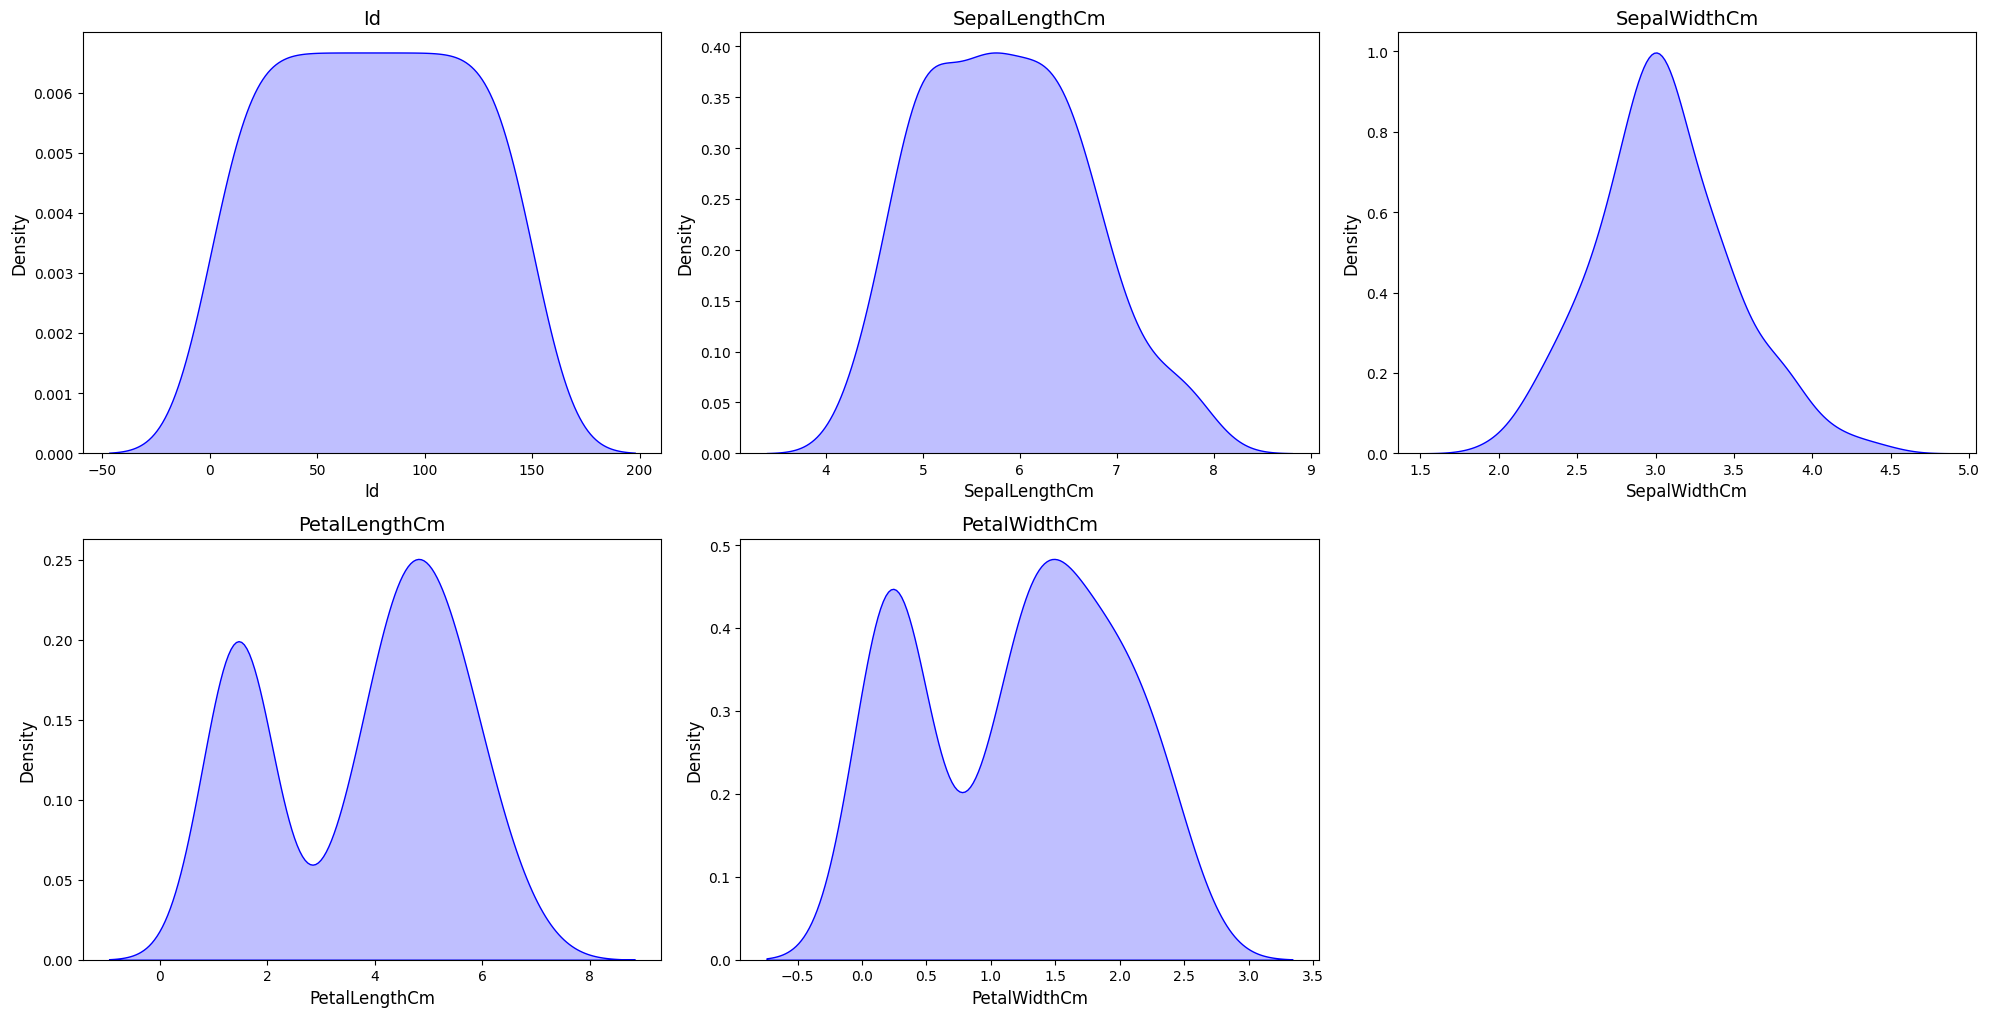

In [7]:
visualize_df.subplot_maker(df, num_cols)

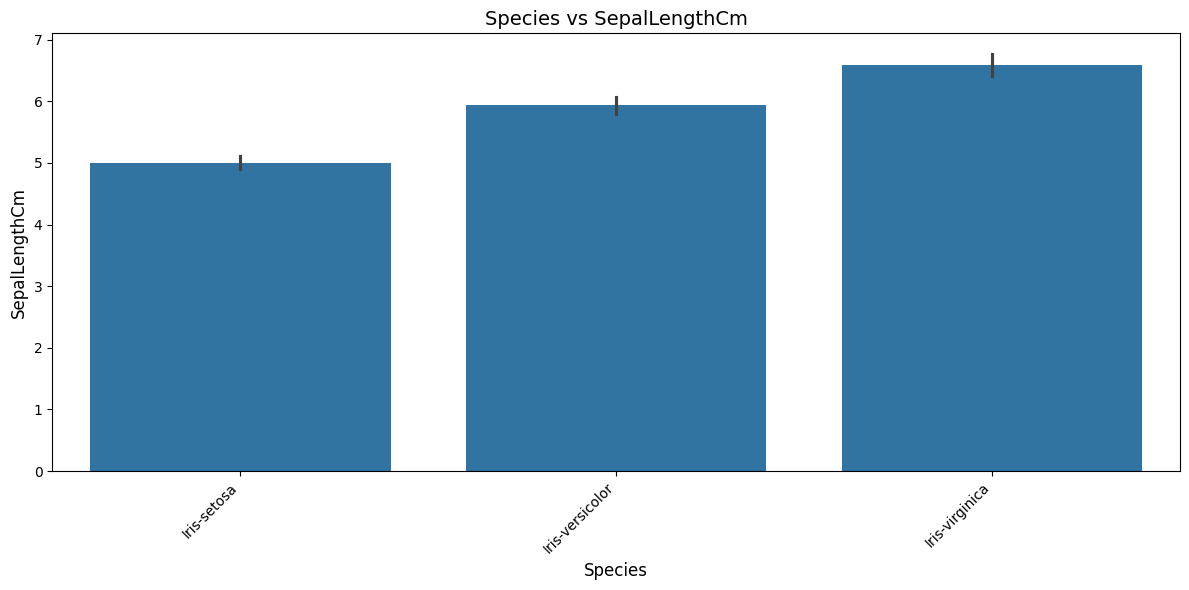

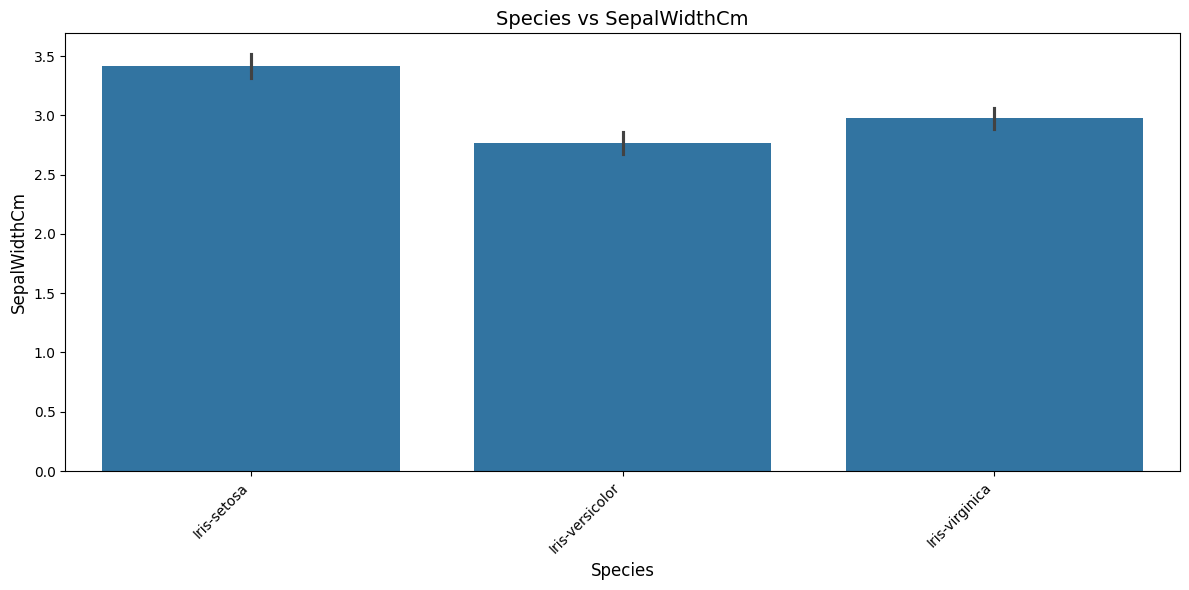

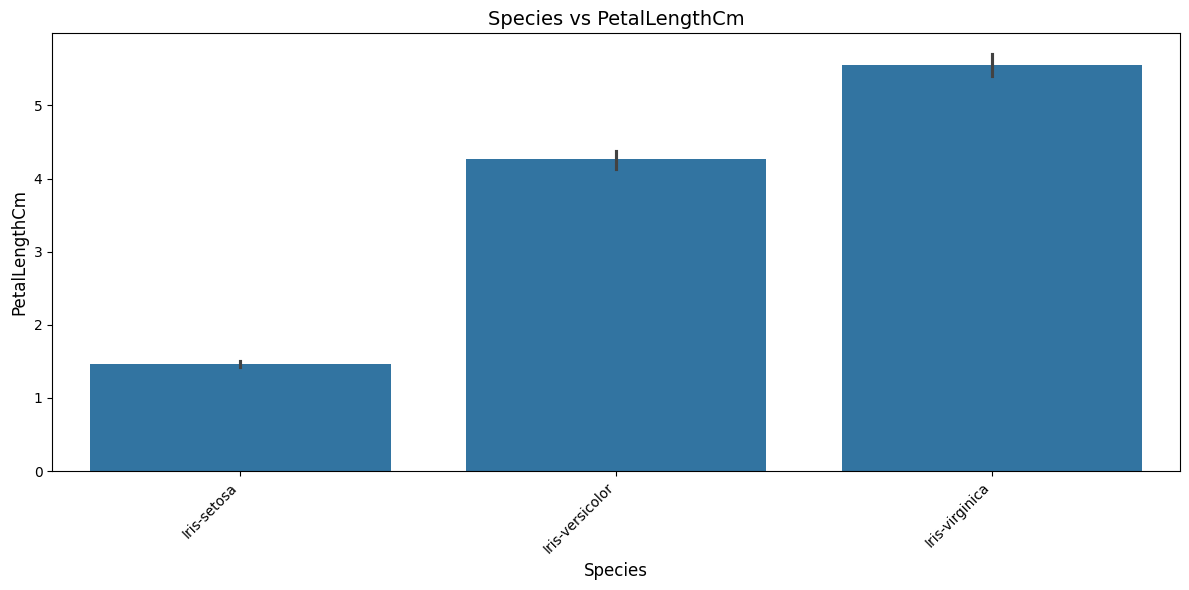

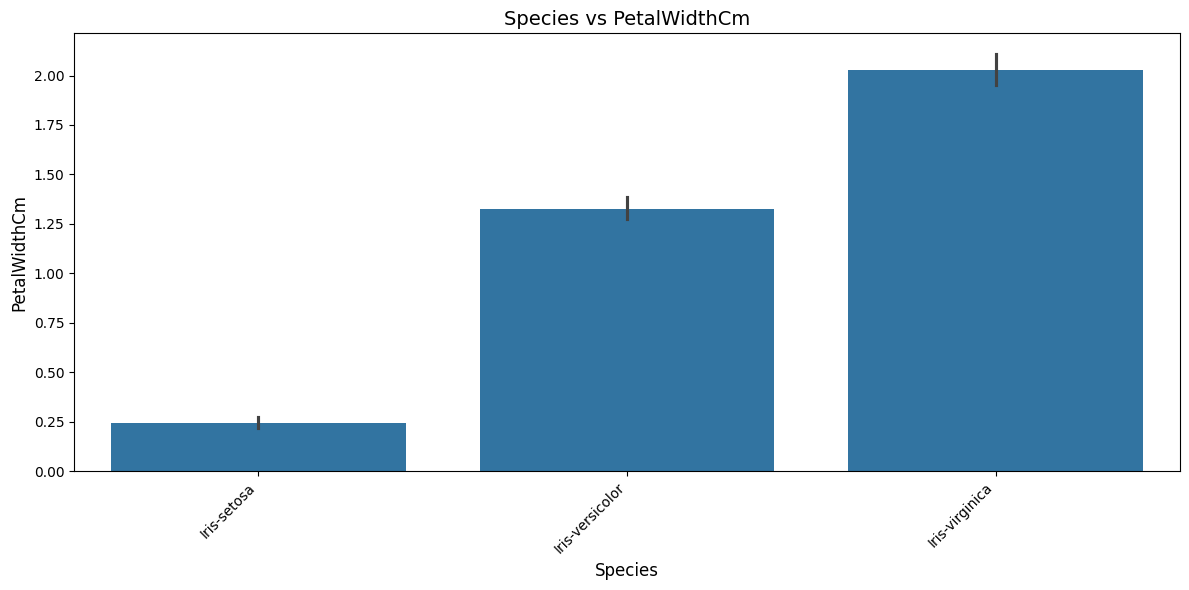

In [8]:
for col in num_cols[1:]:
    visualize_df.barplot_maker(df, "Species", col, f"Species vs {col}")

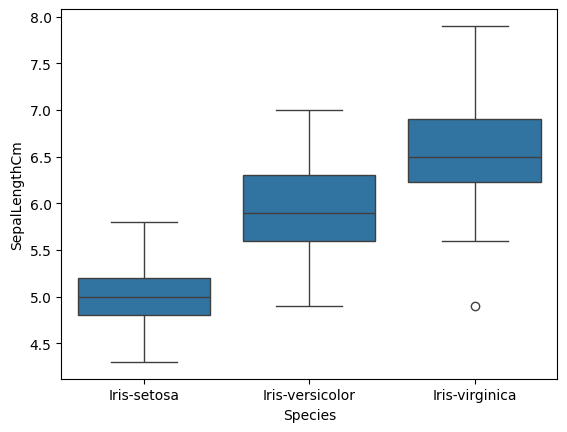

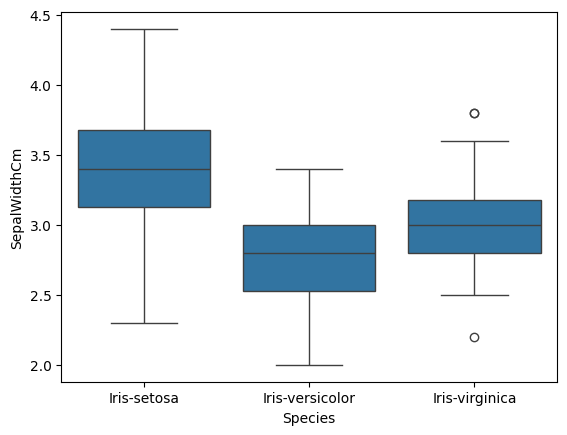

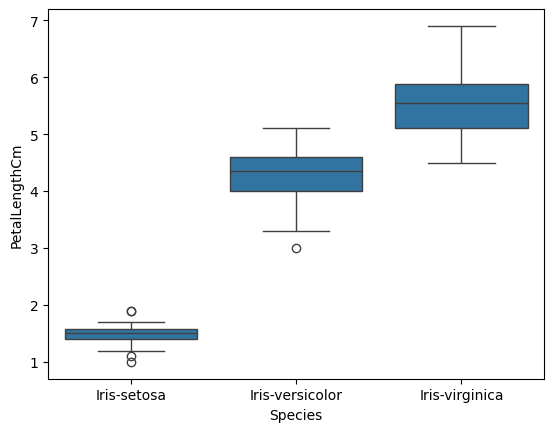

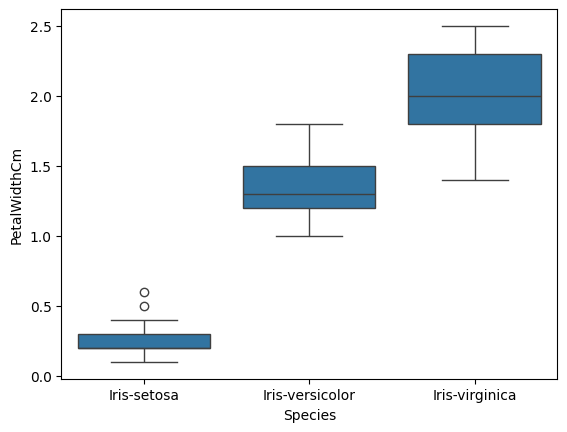

In [9]:
for col in num_cols[1:]:
    visualize_df.boxplot_maker(df, "Species", col)

In [10]:
df.value_counts("Species") # -> Balanced Dataset

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

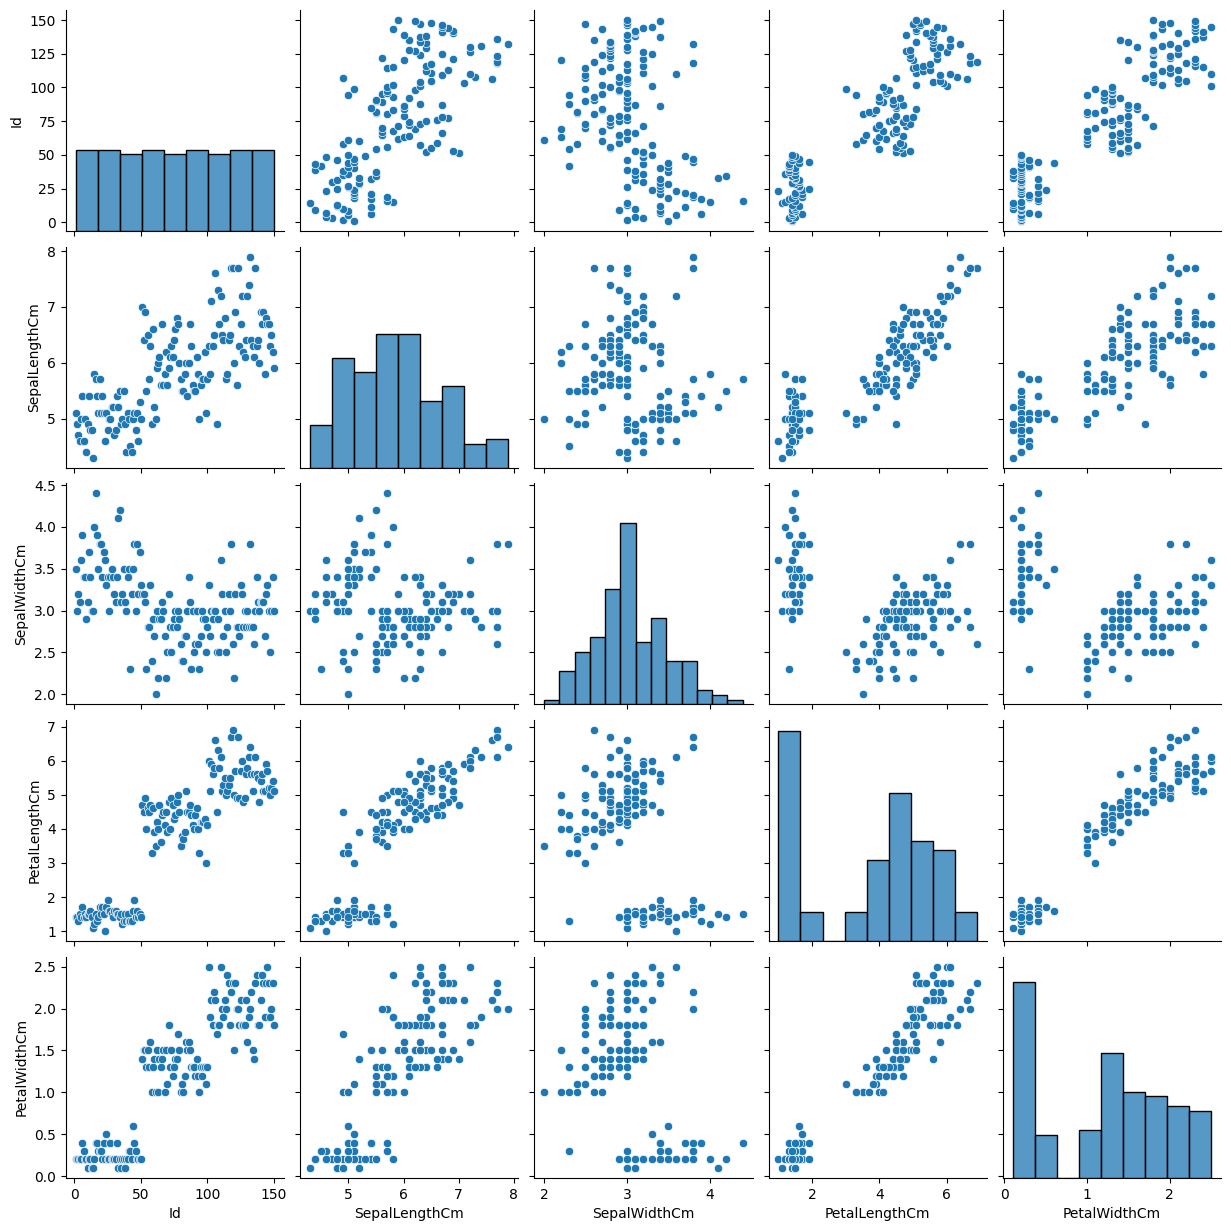

In [11]:
sns.pairplot(df)

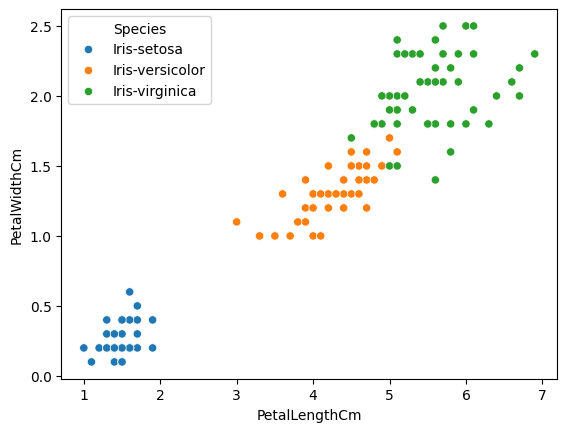

In [12]:
visualize_df.scatterplot_maker(df, "PetalLengthCm", "PetalWidthCm", "Species")

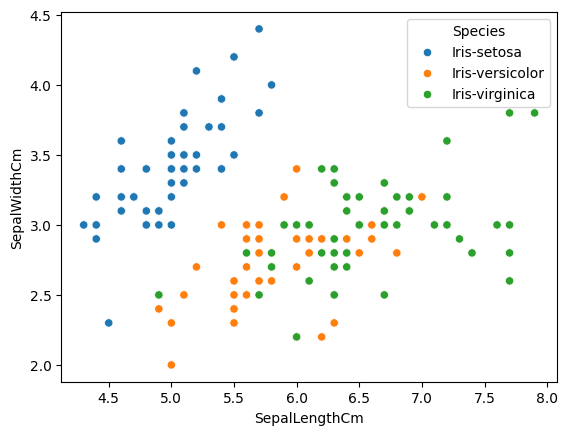

In [13]:
visualize_df.scatterplot_maker(df, "SepalLengthCm", "SepalWidthCm", "Species")

In [14]:
df.drop("Id", axis=1, inplace=True)

In [15]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [17]:
df["Species"] = le.fit_transform(df["Species"])

In [18]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
X = df.drop("Species", axis=1)
y = df["Species"]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model = GaussianNB()


In [24]:
model.fit(X_train, y_train)


GaussianNB()

In [25]:
y_pred = model.predict(X_test)

In [27]:
eval_model.eval_class_model(X_test, y_test, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


(1.0, 1.0, 1.0, 1.0, 1.0)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

svc_model = SVC()
lr_model = LogisticRegression()



In [29]:
svc_model.fit(X_train, y_train)

SVC()

In [30]:
y_pred_svc = svc_model.predict(X_test)

In [31]:
eval_model.eval_class_model(X_test, y_test, svc_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


(1.0, 1.0, 1.0, 1.0, 1.0)

In [32]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
eval_model.eval_class_model(X_test, y_test, lr_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


(1.0, 1.0, 1.0, 1.0, 1.0)